<a href="https://colab.research.google.com/github/AndresPautrat/PDI_UPC/blob/main/EliminarRuido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def filtering(image, mask):
  shift_row=mask.shape[0]//2
  shift_col=mask.shape[1]//2
  
  new_image=np.zeros((image.shape[0]+2*shift_row,image.shape[1]+2*shift_col),np.float32)
  
  new_image[shift_row:shift_row+image.shape[0],shift_col:shift_col+image.shape[1]]=image 
  result=np.zeros(new_image.shape,np.float32)

  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col,image.shape[1]+shift_col):
      aux=new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      aux= new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      result[i,j]=np.sum(aux*mask)
      
  return result[shift_row:image.shape[0]+shift_row,shift_col:image.shape[1]+shift_col]



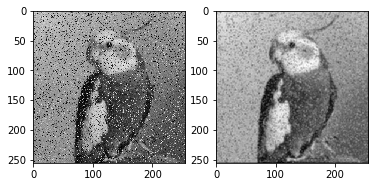

In [ ]:
im=cv2.imread('lorito.jpg',0)
mask=(1/9)*np.ones((3,3))
im2=filtering(im,mask)

plt.figure()
plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im2,cmap='gray')
plt.show()

In [ ]:
def filtroMediana(image,size):
  shift_row=size//2
  shift_col=size//2
  
  new_image=np.zeros((image.shape[0]+2*shift_row,
                      image.shape[1]+2*shift_col),np.float32)
  
  new_image[shift_row:shift_row+image.shape[0],            
            shift_col:shift_col+image.shape[1]]=image 
  
  result=np.zeros(new_image.shape,np.float32)
  
  for i in range(shift_row, image.shape[0]+shift_row):
    for j in range(shift_col,image.shape[1]+shift_col):
      aux=new_image[i-shift_row:i+shift_row+1,j-shift_col:j+shift_col+1]
      val=np.sort(aux,axis=None)
      result[i,j]=val[size**2//2]
      
  return result[shift_row:image.shape[0]+shift_row,
         shift_col:image.shape[1]+shift_col]

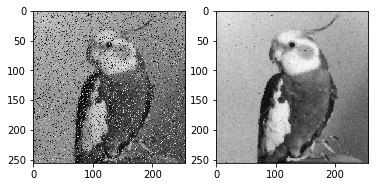

In [ ]:
im=cv2.imread('lorito.jpg',640)
mask=(1/9)*np.ones((3,3))
im2=filtroMediana(im,3)

plt.figure()
plt.subplot(1,2,1),plt.imshow(im,cmap='gray')
plt.subplot(1,2,2),plt.imshow(im2,cmap='gray')
plt.show()

-628.0
221.0


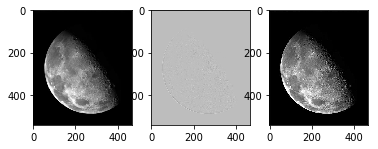

In [ ]:
im4=cv2.imread('moon.jpg',0)
mask=np.array([[0,1,0],[1,-4,1],[0,1,0]])

laplacian=filtering(im4,mask)

print(np.min(laplacian))
print(np.max(laplacian))

out=im4-laplacian

np.clip(out,0,255,out=out)

out==out.astype('uint8')

plt.figure()
plt.subplot(1,3,1),plt.imshow(im,cmap='gray')
plt.subplot(1,3,2),plt.imshow(laplacian,cmap='gray')
plt.subplot(1,3,3),plt.imshow(out,cmap='gray')
plt.show()

-628.0
221.0


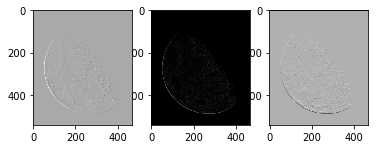

In [ ]:
im4=cv2.imread('moon.jpg',0)
mask1=np.array([[0,0,0],[0,-1,1],[0,0,0]])
mask2=np.array([[0,0,0],[0,-1,0],[0,1,0]])

laplacian1=filtering(im4,mask1)
laplacian2=filtering(im4,mask2)

print(np.min(laplacian))
print(np.max(laplacian))

out=np.sqrt(laplacian1**2+laplacian2**2)



plt.figure()
plt.subplot(1,3,2),plt.imshow(out,cmap='gray')
plt.subplot(1,3,1),plt.imshow(laplacian1,cmap='gray')
plt.subplot(1,3,3),plt.imshow(laplacian2,cmap='gray')
plt.show()

In [ ]:
def borde (image, size):  
  new_image=np.zeros((image.shape[0]+2*size,image.shape[1]+2*size),np.float32)
  
  new_image[size:size+image.shape[0],size:size+image.shape[1]]=image
  for k in range(size):
    for i in range(size, image.shape[0]+size):
      new_image[i][k]=new_image[i][size+1]
      new_image[i][len(new_image)-k-1]=new_image[i][len(new_image)-size-1]
    for j in range(size,image.shape[1]+size):
      new_image[k][j]=new_image[size+1][j]
      new_image[len(new_image)-k-1][j]=new_image[len(new_image)-size-1][j]
  return(new_image)

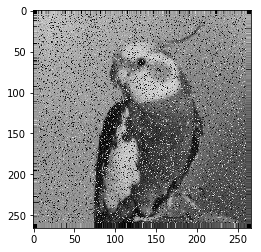

In [ ]:
im=cv2.imread('lorito.jpg',0)
out=borde(im,5)
plt.figure()
plt.subplot(1,1,1),plt.imshow(out,cmap='gray')
plt.show()
